In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

In [2]:
df=pd.read_csv('kmeans.csv',delimiter='\t')[['Distance_Feature','Speeding_Feature']]
data=np.array(df)

In [3]:
df.head()


,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [4]:
print(data)

[[ 71.24  28.  ]
 [ 52.53  25.  ]
 [ 64.54  27.  ]
 ...
 [170.91  12.  ]
 [176.14   5.  ]
 [168.03   9.  ]]


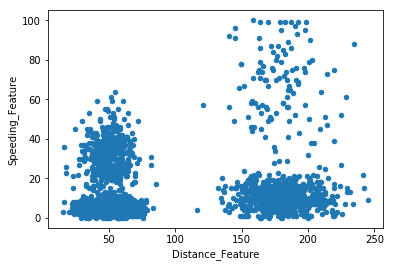

In [5]:
df.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter')

In [6]:
#initializing number of clusters
k=4

In [7]:
centroids=np.array(df.sample(n=k))   #random centroid points taken from the data frame. and then converted to array
new_centroids=centroids[:,np.newaxis,:] # broadcasting done 
distance=np.sqrt(np.sum(np.square(data-new_centroids),axis=2))  #euclidian distance calculated
centroids

array([[62.3 ,  6.  ],
       [58.83,  5.  ],
       [66.04,  5.  ],
       [59.34,  9.  ]])

In [8]:
distance

array([[ 23.74707561,  21.36475837,  21.11912877, ..., 108.77560434,
        113.84439204, 105.77255268],
       [ 26.13442366,  20.96878633,  22.7289265 , ..., 112.29838111,
        117.31      , 109.27323552],
       [ 23.58050042,  24.13545318,  22.05107707, ..., 105.10336293,
        110.1       , 102.06840892],
       [ 22.41896519,  17.38896489,  18.73606149, ..., 111.61032614,
        116.86847308, 108.69      ]])

In [9]:
distance.shape

(4, 4000)

In [10]:
index=np.argmin(distance,axis=0)
index

array([3, 3, 3, ..., 2, 2, 2], dtype=int64)

In [11]:
for i in range(100):
    distance=np.sqrt(np.sum(np.square(data-new_centroids),axis=2))
    index=np.argmin(distance,axis=0)
#c1,c1,c3,c4 are the clusters
    c1=[]
    c2=[]
    c3=[]
    c4=[]
    
#assigning different data set to the particular cluster
    for i in range(len(index)):
        if index[i]==0:
            c1.append(data[i])
        if index[i]==1:
            c2.append(data[i])
        if index[i]==2:
            c3.append(data[i])
        if index[i]==3:
            c4.append(data[i])
            
#updating centroid       
    centroids[0] = np.mean(c1,axis=0)
    centroids[1] = np.mean(c2,axis=0)
    centroids[2] = np.mean(c3,axis=0)
    centroids[3] = np.mean(c4,axis=0)


In [12]:
# no of data point in each cluster
len(c1),len(c2),len(c3),len(c4)

(1443, 1355, 799, 403)

In [13]:
centroids

array([[ 57.92030492,   5.28620929],
       [ 41.54426568,   5.3904059 ],
       [180.09647059,  18.30788486],
       [ 50.61421836,  33.06203474]])

In [14]:
centroids.shape

(4, 2)

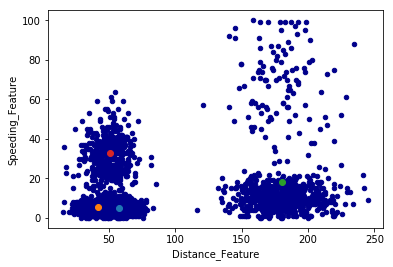

In [15]:
#Plotting of clusters
df.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter',color='DarkBlue')
for i in range(len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1])
    